In [1]:
import sys
read = sys.stdin.buffer.read
import time
from heapq import heappop, heappush
import random
import math

import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
def visualize(res, xy, r):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes()
    
    base = patches.Rectangle(xy=(0,0), width=10000, height=10000, color='white')
    ax.add_patch(base)
    
    n = len(r)
    for i in range(n):
        ri = r[i]
        a,b,c,d = res[i]
        x,y = xy[i]
        ab = (a,b)
        wid = c-a
        hei = d-b
        si = wid*hei
        p = 1-(1-min(ri,si)/max(ri,si))**2
        
        
        box = patches.Rectangle(xy=ab, width=wid, height=hei,
                                color=plt.cm.bwr(p), alpha=0.7, label=int(p*100),
                                edgecolor='black')
        ax.add_patch(box)
        
        point = patches.Circle(xy = (x,y), radius=50)
        ax.add_patch(point)
            
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    
    plt.show()

In [3]:
def initialize(n,xy,r):
    res = []
    it = iter(xy)
    score_i = [0] * n
    for i in range(n):
        x,y = xy[i]
        ri = r[i]
        res.append([x,y,x+1,y+1])
        si = 1
        score_i[i] = 1 - (1 - min(ri,si)/max(ri,si))**2
        
    return res,score_i

In [4]:
def initialize_on_the_way(n,xy,r,res0,p0,p1):
    res = []
    score_i = [0] * n
    for i in range(n):
        x,y = xy[i]
        ri = r[i]
        a0,b0,c0,d0 = x,y,x+1,y+1
        a,b,c,d = res0[i]

        if random.random() > 0.7:
            res.append([a,b,c,d])
            continue
        a = a0 - int((a0-a) * (random.random() * (p1-p0) +p0))
        b = b0 - int((b0-b) * (random.random() * (p1-p0) +p0))
        c = c0 + int((c-c0) * (random.random() * (p1-p0) +p0))
        d = d0 + int((d-d0) * (random.random() * (p1-p0) +p0))
        res.append([a,b,c,d])
        si = (c-a) * (d-b)
        score_i[i] = 1 - (1 - min(ri,si)/max(ri,si))**2
    return res,score_i

In [5]:
# def able_extend2(x, r, res, able_exs, change_log, last_change):
#     # 計算量改善。前回からそんなに経っていない場合、直近で動かした奴だけ再確認する。
#     n = len(r)
#     a,b,c,d = res[x]
#     ri = r[x]
# #     able_x = ri//(d-b) -(c-a)
# #     able_y = ri//(c-a) -(d-b)

#     able_ex = able_exs[x][:] # up,left,down,right
#     if len(change_log) - last_change[x] - 1 < n:
#         done = [0] * n
#         for i in range(last_change[x]+1, len(change_log)):
#             i = change_log[i]
#             if done[i] == 1:
#                 continue
#             done[i] = 1
#             if i == x:
#                 continue
#             ai,bi,ci,di = res[i]
#             # up
#             if b < di and bi < d and ci <= a:
#                 able_ex[0] = min(able_ex[0], a - ci)
#             # down
#             elif b < di and bi < d and c <= ai:
#                 able_ex[2] = min(able_ex[2], ai - c)
#             # left
#             elif a < ci and ai < c and di <= b:
#                 able_ex[1] = min(able_ex[1], b - di)
#             # right
#             elif a < ci and ai < c and d <= bi:
#                 able_ex[3] = min(able_ex[3], bi - d)
#     else:
    
#         for i in range(n):
#             if i == x:
#                 continue
#             ai,bi,ci,di = res[i]
#             # up
#             if b < di and bi < d and ci <= a:
#                 able_ex[0] = min(able_ex[0], a - ci)
#             # down
#             elif b < di and bi < d and c <= ai:
#                 able_ex[2] = min(able_ex[2], ai - c)
#             # left
#             elif a < ci and ai < c and di <= b:
#                 able_ex[1] = min(able_ex[1], b - di)
#             # right
#             elif a < ci and ai < c and d <= bi:
#                 able_ex[3] = min(able_ex[3], bi - d)
#     max_num = max(able_ex)
#     if max_num <= 0:
#         return able_ex,-1
#     start_i = random.randint(-3,0)
#     for i in range(start_i, start_i+4):
#         if able_ex[i] == max_num:
#             return able_ex,i%4

In [6]:
def able_extend(x, r, res):
    # O(4n)
    n = len(r)
    a,b,c,d = res[x]
    ri = r[x]
    able_x = ri//(d-b) -(c-a)
    able_y = ri//(c-a) -(d-b)

    able_ex = [min(a, able_x),
           min(b, able_y),
           min(10000-c, able_x),
           min(10000-d, able_y)] # up,left,down,right
    for i in range(n):
        if i == x:
            continue
        ai,bi,ci,di = res[i]
        # up
        if b < di and bi < d and ci <= a:
            able_ex[0] = min(able_ex[0], a - ci)
        # down
        elif b < di and bi < d and c <= ai:
            able_ex[2] = min(able_ex[2], ai - c)
        # left
        elif a < ci and ai < c and di <= b:
            able_ex[1] = min(able_ex[1], b - di)
        # right
        elif a < ci and ai < c and d <= bi:
            able_ex[3] = min(able_ex[3], bi - d)
    max_num = max(able_ex)
    if max_num <= 0:
        return able_ex,-1
    start_i = random.randint(-3,0)
    for i in range(start_i, start_i+4):
        if able_ex[i] == max_num:
            return able_ex,i%4

In [7]:
def calc_score_x(i, r, res):
    a,b,c,d = res[i]
    si = (c-a) * (d-b)
    ri = r[i]
    return 1 - (1 - min(ri,si)/max(ri,si))**2
    

In [30]:
def eval_extend2(i, xy, r, res, cyc, under):
    # 内側を重視してみる
    a,b,c,d = res[i]
    ri = r[i]
    si = (c-a) * (d-b)
    point = 1 - (1 - min(ri,si)/max(ri,si))**2
    rem_point = 1 - point
    rem_area = max(0, ri-si)
    x,y = xy[i]
        
    if rem_area == 0:
        return 0

#     if cyc > 3:
#         return max(abs(5000-x),abs(5000-y)) * (1 - rem_area/ri)**2 / (under[i]+1)**4
#     else:
#         return max(abs(5000-x),abs(5000-y)) * (1 - rem_area/ri)**2 * (0.5 + random.random())
    if cyc > 3:
        return max(abs(5000-x),abs(5000-y)) * (1 - rem_area/ri)**2 / (under[i]+1)**4
    else:
        if cyc % 2 == 1:
            return max(abs(5000-x),abs(5000-y)) * (1 - rem_area/ri)**2 * (0.5 + random.random())
        else:
            return (-1 * rem_point / rem_area)* (under[i]+1)**5


In [31]:
def eval_extend(i, xy, r, res, cyc, under):
    a,b,c,d = res[i]
    ri = r[i]
    si = (c-a) * (d-b)
    point = 1 - (1 - min(ri,si)/max(ri,si))**2
    rem_point = 1 - point
    rem_area = max(0, ri-si)
        
    if rem_area == 0:
        return 0

    if cyc > 8:
        return (-1 * rem_point / rem_area)* (under[i]+1)**5
    else:
        return (-1 * rem_point / rem_area)

In [32]:
def eval_extend_random(i, xy, r, res, cyc, under):
    return -1 * random.random() *  (under[i]+1)**5
    

In [33]:
def search_on_the_way(n,xy,r,under,cyc,res0,p0,p1):
    # 初期化
    res, score_i = initialize_on_the_way(n,xy,r,res0,p0,p1)
    score = sum(score_i)
    ex_cnt = [0] * n
    
    # 更新順位heapqueの作成
    eval_ex = []
    for i in range(n):
        eval_score = eval_extend2(i, xy, r, res, cyc, under)
#         eval_score = eval_extend_random(i, xy, r, res, cyc, under)

        if eval_score != 0:
            heappush(eval_ex, (eval_score, i))
    
    iter_cnt = 0
    
    while eval_ex:
        iter_cnt += 1
        # 時間確認
        if iter_cnt % 500 == 0:
            if time.time() - start > TIME_LIMIT:
                break
        
        # 伸ばすbox、辺、長さの決定
        _,i = heappop(eval_ex)
        able_ex, idx = able_extend(i, r, res)
        if idx == -1:
            # 伸ばせる辺がない場合
            continue
        
        # ここは要調整
        if ex_cnt[i] < 10:
            idx = random.randint(0,3)
            ex_width = able_ex[idx]**0.5
            rand = random.random() + 0.5
            ex_width = math.ceil(ex_width * rand)
        elif ex_cnt[i] < 15:
            ex_width = able_ex[idx]**0.8
            rand = random.random() + 1
            ex_width = math.ceil(ex_width * rand)
        elif ex_cnt[i] < 20:
            rand = random.random() * 0.2 + 0.1 * min(8,(ex_cnt[i]-4)//2)
            ex_width = math.ceil(able_ex[idx] * rand)
        else:
            rand = random.random() * 0.1 + 0.9
            ex_width = math.ceil(able_ex[idx] * rand )
        
        # 最大値を超えないように調整
        ex_width = min(ex_width, able_ex[idx])
        
        # 値の更新
        if idx < 2:
            res[i][idx] -= ex_width
        else:
            res[i][idx] += ex_width
        new_score = calc_score_x(i,r,res)
        score += new_score - score_i[i]
        score_i[i] = new_score
        
        # 更新の必要のないboxはスキップ
        if score_i[i] > 0.99:
            continue
        
        # 更新順位heapqueの更新
        eval_score = eval_extend2(i, xy, r, res, cyc, under)
#         eval_score = eval_extend_random(i, xy, r, res, cyc, under)
        if eval_score != 0:
            heappush(eval_ex, (eval_score, i))
        
        ex_cnt[i] += 1
        
        # デバッグ用出力
        if DEBUG_SEARCH:
            if iter_cnt % 500 == 0:
                print(cyc,iter_cnt,score)
    
    return res, score, score_i, iter_cnt

In [34]:
def search_all(n,xy,r,under,cyc):
    # 初期化
    res, score_i = initialize(n,xy,r)
    score = sum(score_i)
    ex_cnt = [0] * n
    
    # 更新順位heapqueの作成
    eval_ex = []
    for i in range(n):
        eval_score = eval_extend2(i, xy, r, res, cyc, under)
#         eval_score = eval_extend_random(i, xy, r, res, cyc, under)

        if eval_score != 0:
            heappush(eval_ex, (eval_score, i))
    
    iter_cnt = 0
    
    while eval_ex:
        iter_cnt += 1
        # 時間確認
        if iter_cnt % 500 == 0:
            if time.time() - start > TIME_LIMIT:
                break
        
        # 伸ばすbox、辺、長さの決定
        _,i = heappop(eval_ex)
        able_ex, idx = able_extend(i, r, res)
        if idx == -1:
            # 伸ばせる辺がない場合
            continue
        
        # ここは要調整
        if ex_cnt[i] < 10:
            idx = random.randint(0,3)
            ex_width = able_ex[idx]**0.5
            rand = random.random() + 0.5
            ex_width = math.ceil(ex_width * rand)
        elif ex_cnt[i] < 20:
            ex_width = able_ex[idx]**0.8
            rand = random.random() + 1
            ex_width = math.ceil(ex_width * rand)
        elif ex_cnt[i] < 30:
            rand = random.random() * 0.2 + 0.1 * min(8,(ex_cnt[i]-14)//2)
            ex_width = math.ceil(able_ex[idx] * rand)
        else:
            rand = random.random() * 0.1 + 0.9
            ex_width = math.ceil(able_ex[idx] * rand )
        
        # 最大値を超えないように調整
        ex_width = min(ex_width, able_ex[idx])
        
        # 値の更新
        if idx < 2:
            res[i][idx] -= ex_width
        else:
            res[i][idx] += ex_width
        new_score = calc_score_x(i,r,res)
        score += new_score - score_i[i]
        score_i[i] = new_score
        
        # 更新の必要のないboxはスキップ
        if score_i[i] > 0.99:
            continue
        
        # 更新順位heapqueの更新
        eval_score = eval_extend2(i, xy, r, res, cyc, under)
#         eval_score = eval_extend_random(i, xy, r, res, cyc, under)
        if eval_score != 0:
            heappush(eval_ex, (eval_score, i))
        
        ex_cnt[i] += 1
        
        # デバッグ用出力
        if DEBUG_SEARCH:
            if iter_cnt % 500 == 0:
                print(cyc,iter_cnt,score)
                print(ex_cnt)
                visualize(res, xy, r)
                
    
    return res, score, score_i, iter_cnt
    

In [35]:
def main(*args):
    # 入力
    if len(args) == 0:
        n,*xyr = map(int,read().split())
    else:
        n = args[0]
        xyr = args[1]
    
    # 変数準備
    xy = []
    r = []
    it = iter(xyr)
    for xi,yi,ri in zip(it,it,it):
        xy.append([xi,yi])
        r.append(ri)
    res = []
    res_score = 0
    cyc = 0
    under = [0] * n
    
    while time.time() - start < TIME_LIMIT:
        # 出力作成
        if cyc == 0:
            res2, score, score_i, iter_cnt = search_all(n,xy,r,under,cyc)
        else:
            p0 = random.random()*0.2
            p1 = p0 + random.random() * 0.8
            res2, score, score_i, iter_cnt = search_on_the_way(n,xy,r,under,cyc,res,p0,p1)
                
        # 更新
        if score > res_score:
            res,res2 = res2,res
            res_score = score
        for i in range(n):
            if score_i[i] < UNDER:
                under[i] += 1
        
        # デバッグ用出力
        if DEBUG:
            print(cyc, res_score/n)
            pass
        
        cyc += 1
        
    # 解答出力
#     print('\n'.join(map(lambda x: ' '.join(map(str,x)), res)))
    
    # デバッグ用出力
    if DEBUG:
        print(res_score / n)
        print(cyc)
        print(under)
        visualize(res, xy, r)

    return [res_score / n, cyc]

In [36]:
# deta生成
n = 100
# n = int(50 * 4 ** random.random())

x = random.sample(range(10000), k=n)
y = random.sample(range(10000), k=n)
q = random.sample(range(100000000), k=n-1)
q += [0, 100000000]
q.sort()
r = []
for i in range(n):
    r.append(q[i+1] - q[i])

xyr = []
for xi,yi,ri in zip(x,y,r):
    xyr += [xi,yi,ri]

# print(n)
# print(len(xyr))
# print(xyr)
print(n)
for xi,yi,ri in zip(x,y,r):
    print(xi,yi,ri)

100
7294 4528 97929
5540 3495 97992
459 9134 25563
6369 5960 2747317
3434 2248 1490289
5108 5232 506695
4303 5180 705549
5272 1819 20071
7055 9526 1103021
9455 5572 2155541
761 5889 21663
2776 9138 1953345
8344 5016 355593
450 4838 344819
9407 7372 1988368
5442 9868 837999
6861 4631 1469820
7837 6809 1164897
911 4269 360926
3719 9738 556732
3724 3309 51550
3766 9392 286320
8312 4439 389622
6268 7269 1080164
308 6513 890089
4327 3685 242020
9131 4771 1591961
2695 8817 1694511
3370 6852 2831402
5136 6318 1150106
4985 3274 538414
8302 486 1364295
9923 32 1022399
3677 4383 307027
1090 6915 741686
8496 6358 133333
8964 8711 1178781
3069 5034 587657
1104 2657 869376
8044 2720 1444000
8845 3498 604562
6292 5456 156679
7379 8398 3446463
8355 3087 1222207
4041 3942 2791936
5749 2228 1064857
8146 4318 1628163
7620 9017 194904
8561 3265 454250
5605 7811 130025
8699 6605 1189530
4726 863 445053
4994 4012 1810555
6316 8855 998690
3713 4181 1113808
2568 1547 727715
5203 7892 5375654
9382 2216 378685

0 0.8991395342205215
1 0.9081109929293223
2 0.9194404215256633
3 0.9309236284926573
4 0.9309236284926573
5 0.9401850927277197
6 0.9401850927277197
7 0.9401850927277197
8 0.944520983887792
9 0.944520983887792
10 0.944520983887792
11 0.944520983887792
12 0.944520983887792
13 0.944520983887792
14 0.944520983887792
15 0.944520983887792
16 0.944520983887792
17 0.9495831685409604
18 0.9495831685409604
19 0.9495831685409604
20 0.9495831685409604
21 0.9495831685409604
22 0.9495831685409604
23 0.9495831685409604
24 0.9495831685409604
25 0.9495831685409604
26 0.9495831685409604
27 0.9495831685409604
28 0.9495831685409604
29 0.9495831685409604
30 0.9495831685409604
31 0.9495831685409604
32 0.9495831685409604
33 0.9495831685409604
34 0.9495831685409604
35 0.9495831685409604
36 0.9495831685409604
37 0.9495831685409604
38 0.9495831685409604
39 0.9495831685409604
40 0.9495831685409604
41 0.9495831685409604
42 0.9495831685409604
43 0.9495831685409604
44 0.9495831685409604
45 0.9495831685409604
46 0.94

C:\Users\scare\Anaconda3\lib\site-packages\matplotlib\patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


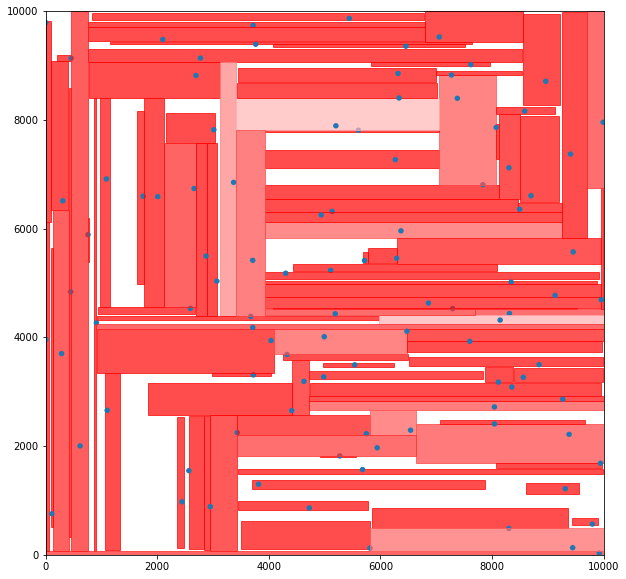

In [37]:
#定数など
start = time.time()
TIME_LIMIT = 20
random.seed(42)

UNDER = 0.8
DEBUG = True
DEBUG_SEARCH = False


if __name__ == "__main__":
    main(n,xyr)

In [2]:
%%timeit

for i in range(10**6):
    time.time()

205 ms ± 7.43 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [239]:
# 複数回テスト
for _ in range(10):
    # deta生成
#     n = 200
    n = int(50 * 4 ** random.random())

    x = random.sample(range(10000), k=n)
    y = random.sample(range(10000), k=n)
    q = random.sample(range(100000000), k=n-1)
    q += [0, 100000000]
    q.sort()
    r = []
    for i in range(n):
        r.append(q[i+1] - q[i])

    xyr = []
    for xi,yi,ri in zip(x,y,r):
        xyr += [xi,yi,ri]
    
    #定数など
    start = time.time()
    TIME_LIMIT = 20
    random.seed(42)

    UNDER = 0.8
    DEBUG = False
    DEBUG_SEARCH = False


    if __name__ == "__main__":
        print(n,*main(n,xyr))

121 0.9374006253424013 229
83 0.9659617637957729 412
64 0.9289344295948193 639
79 0.9558899031867264 438
55 0.9279602673115017 801
119 0.9485942361244494 236
124 0.9555753908309251 210
88 0.9576651667990839 379
129 0.9433835629619257 190
63 0.9628079762362398 573


In [15]:
def main_once(*args):
    # 入力
    if len(args) == 0:
        n,*xyr = map(int,read().split())
    else:
        n = args[0]
        xyr = args[1]
    
    # 変数準備
    xy = []
    r = []
    it = iter(xyr)
    for xi,yi,ri in zip(it,it,it):
        xy.append([xi,yi])
        r.append(ri)
    res = []
    res_score = 0
    cyc = 0
    under = [0] * n
    
    while time.time() - start < TIME_LIMIT:
        # 出力作成
        if cyc == 0:
            res2, score, score_i, iter_cnt = search_all(n,xy,r,under,cyc)
        else:
            res2, score, score_i, iter_cnt = search_on_the_way(n,xy,r,under,cyc,res,0.1,0.7)
                
        # 更新
        if score > res_score:
            res,res2 = res2,res
            res_score = score
        for i in range(n):
            if score_i[i] < UNDER:
                under[i] += 1
        
        # デバッグ用出力
        if DEBUG:
            print(cyc, res_score/n)
            pass
        
        cyc += 1
        break
        
    # 解答出力
#     print('\n'.join(map(lambda x: ' '.join(map(str,x)), res)))
    
    # デバッグ用出力
    if DEBUG:
        print(res_score / n)
        print(cyc)
        print(under)
        visualize(res, xy, r)

    return [res_score / n, cyc]

0 500 3.726709859345821
[5, 4, 6, 2, 3, 5, 5, 5, 4, 11, 5, 4, 5, 6, 8, 2, 2, 6, 2, 10, 3, 2, 7, 6, 5, 2, 7, 2, 5, 3, 6, 5, 5, 3, 8, 6, 5, 5, 5, 5, 10, 4, 9, 2, 6, 7, 2, 3, 4, 4, 5, 11, 4, 10, 6, 3, 3, 9, 4, 5, 5, 4, 5, 7, 3, 9, 4, 4, 5, 2, 2, 2, 2, 6, 6, 3, 10, 4, 9, 2, 6, 3, 4, 6, 2, 5, 9, 4, 4, 4, 4, 4, 6, 3, 4, 2, 6, 8, 8, 8]


C:\Users\scare\Anaconda3\lib\site-packages\matplotlib\patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


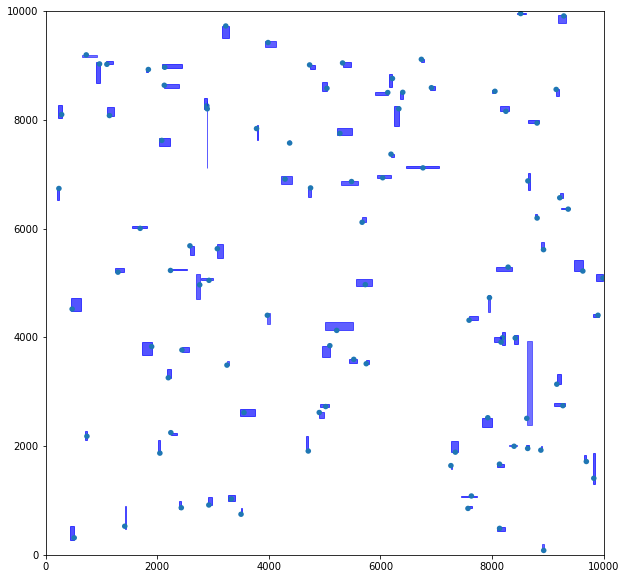

0 1000 26.64282032394439
[11, 8, 11, 9, 7, 12, 11, 11, 11, 13, 11, 11, 11, 11, 11, 2, 9, 11, 6, 14, 9, 11, 11, 9, 11, 6, 12, 5, 11, 10, 11, 11, 11, 8, 12, 11, 7, 12, 8, 8, 16, 9, 12, 5, 9, 11, 5, 8, 7, 11, 11, 20, 8, 11, 11, 11, 6, 11, 11, 11, 11, 11, 12, 11, 8, 12, 11, 11, 10, 5, 11, 4, 5, 11, 11, 11, 13, 11, 18, 6, 11, 10, 12, 11, 9, 11, 11, 11, 6, 9, 11, 8, 11, 6, 11, 6, 11, 11, 11, 11]


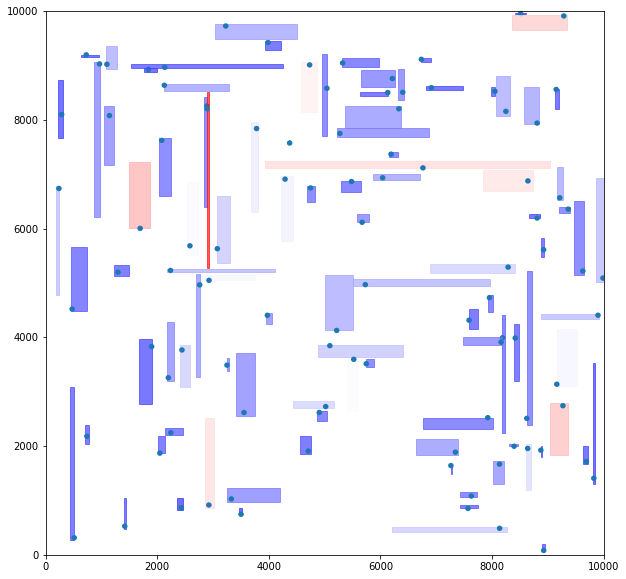

0 1500 70.03289950190022
[16, 11, 13, 12, 11, 21, 13, 12, 14, 21, 12, 13, 14, 13, 18, 5, 12, 14, 11, 33, 11, 13, 21, 11, 18, 11, 28, 12, 14, 12, 12, 12, 16, 12, 18, 22, 13, 22, 11, 12, 29, 12, 21, 11, 13, 15, 11, 11, 11, 13, 18, 20, 13, 31, 12, 16, 12, 18, 15, 15, 13, 13, 23, 18, 14, 28, 11, 11, 13, 11, 12, 11, 11, 16, 16, 14, 17, 15, 23, 12, 18, 12, 14, 14, 13, 15, 21, 12, 12, 11, 13, 12, 12, 11, 16, 11, 12, 19, 25, 15]


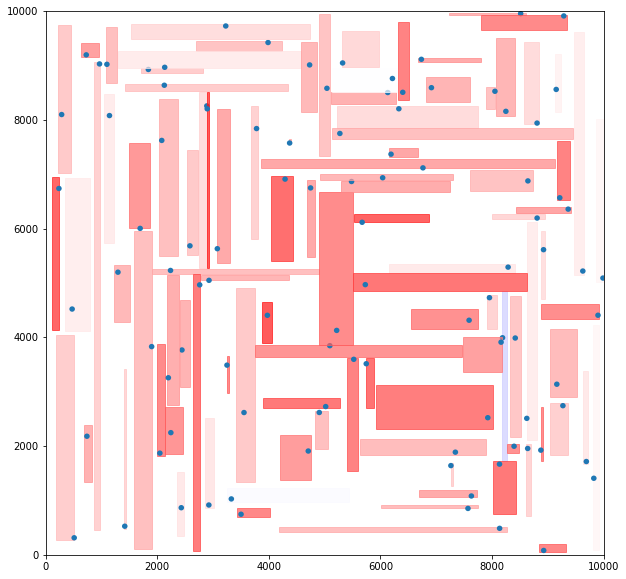

0 0.9330151909577526
0.9330151909577526
1
[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


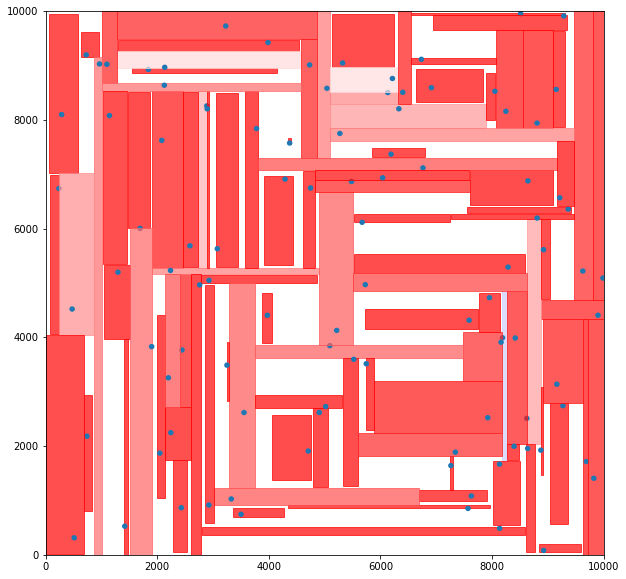

In [18]:
#定数など
start = time.time()
TIME_LIMIT = 3
random.seed(42)

UNDER = 0.8
DEBUG = True
DEBUG_SEARCH = True


if __name__ == "__main__":
    main_once(n,xyr)